Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['legend.markerscale']= 3.0

## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [4]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [5]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

In [6]:
poly = PolynomialFeatures(1, include_bias=True)
poly.fit(X)
phi = poly.transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [7]:
from numpy import linalg
# Vaš kôd ovdje

In [8]:
w_1 = np.dot(np.dot( linalg.inv( np.dot( np.transpose(phi), phi)), np.transpose(phi)), y)

w_2 = np.dot(linalg.pinv(phi), y)

print("w_1 = ", w_1)
print("w_2 = ", w_2)

w_1 =  [2.2        0.45714286]
w_2 =  [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

w = [2.2        0.45714286]
X_tilda = 
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]
h(x_tilda) =  [2.2        2.65714286 3.11428571 4.02857143]
y =  [4 1 2 5]
E_kroz2 =  4.085714285714285
E_MSE =  2.0428571428571427


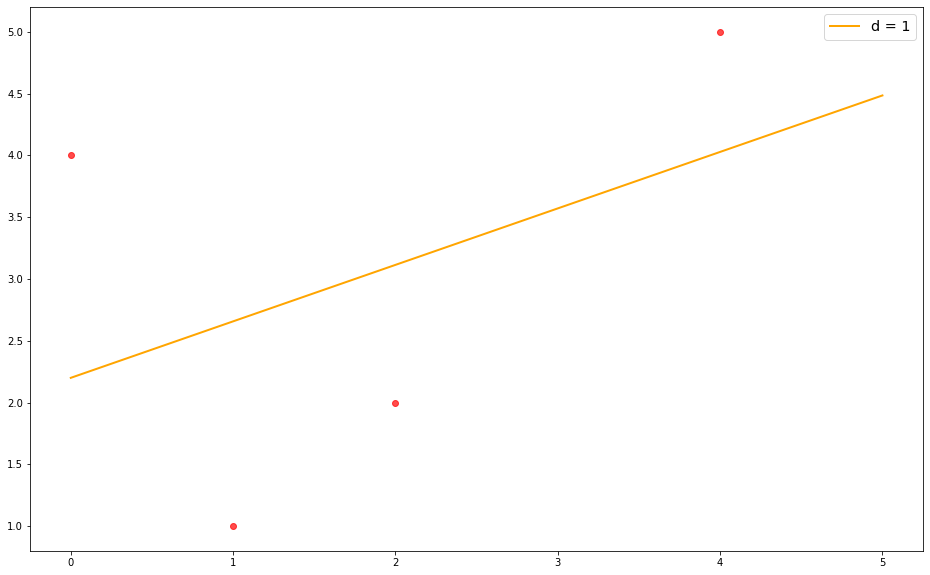

In [9]:
# Vaš kôd ovdje

def h(w, X_tilda): return np.dot(X_tilda, w)

X_tilda = phi

w = w_1

print("w =", w)
print("X_tilda = \n", X_tilda)

hx = h(w, X_tilda)
print("h(x_tilda) = ", hx)
print("y = ", y)


s = np.linspace(0,5);

s = s.reshape(s.shape[0], 1)

s_tilda = poly.fit_transform(s)

plt.plot(s, h(w, s_tilda), c='orange', label='d = 1')

plt.plot(X, y, 'o', c='red', alpha=0.7)

E_kroz2 = 1 / 2 * sum((y - hx) ** 2)


from sklearn.metrics import mean_squared_error
E = mean_squared_error(y, hx)


print("E_kroz2 = ", E_kroz2 )
print("E_MSE = ", E )

plt.legend()
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [10]:
# Vaš kôd ovdje

w_moze = np.dot(linalg.pinv(phi), y)
print(w_moze)

try:
    w_nemoze = np.dot(linalg.inv(phi), y)
except:
    print("linalg.inv(phi) ne moze!")

[2.2        0.45714286]
linalg.inv(phi) ne moze!


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [11]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression(fit_intercept=True, normalize=True).fit(X,y)
print(reg.intercept_)
print(reg.coef_)

pred = reg.predict(X)
print("prediciton = ", pred)


E_kroz2 = 1 / 2 * sum((y - pred) ** 2)

from sklearn.metrics import mean_squared_error
E = mean_squared_error(y, pred)


print("E_kroz2 = ", E_kroz2 )
print("E_MSE = ", E )

2.2
[0.45714286]
prediciton =  [2.2        2.65714286 3.11428571 4.02857143]
E_kroz2 =  4.085714285714286
E_MSE =  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [12]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return  f(X) + normal(0, noise, np.shape(X))

In [13]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

[       X        |         y     ]
[[-5.00000000e+00  4.21220276e+02]
 [-4.79591837e+00  3.50313065e+02]
 [-4.59183673e+00  2.85268957e+02]
 [-4.38775510e+00  1.51334727e+02]
 [-4.18367347e+00  2.71251568e+02]
 [-3.97959184e+00  2.02890507e+02]
 [-3.77551020e+00 -3.70523738e+01]
 [-3.57142857e+00  1.30007234e+01]
 [-3.36734694e+00 -4.93185659e+01]
 [-3.16326531e+00  3.73817238e+02]
 [-2.95918367e+00 -2.86552126e+02]
 [-2.75510204e+00 -4.69227924e+01]
 [-2.55102041e+00  2.60275154e+01]
 [-2.34693878e+00  2.13075015e+01]
 [-2.14285714e+00  8.85758209e+01]
 [-1.93877551e+00  7.99995392e+01]
 [-1.73469388e+00 -9.55899760e+01]
 [-1.53061224e+00  1.95768942e+02]
 [-1.32653061e+00 -6.62695671e+01]
 [-1.12244898e+00 -1.68419976e+02]
 [-9.18367347e-01  2.32484960e+02]
 [-7.14285714e-01 -2.27251936e+02]
 [-5.10204082e-01  3.35259554e+01]
 [-3.06122449e-01 -4.42007618e+01]
 [-1.02040816e-01 -2.37994697e+01]
 [ 1.02040816e-01  7.01653772e+01]
 [ 3.06122449e-01  1.06945155e+01]
 [ 5.10204082e-01 -7

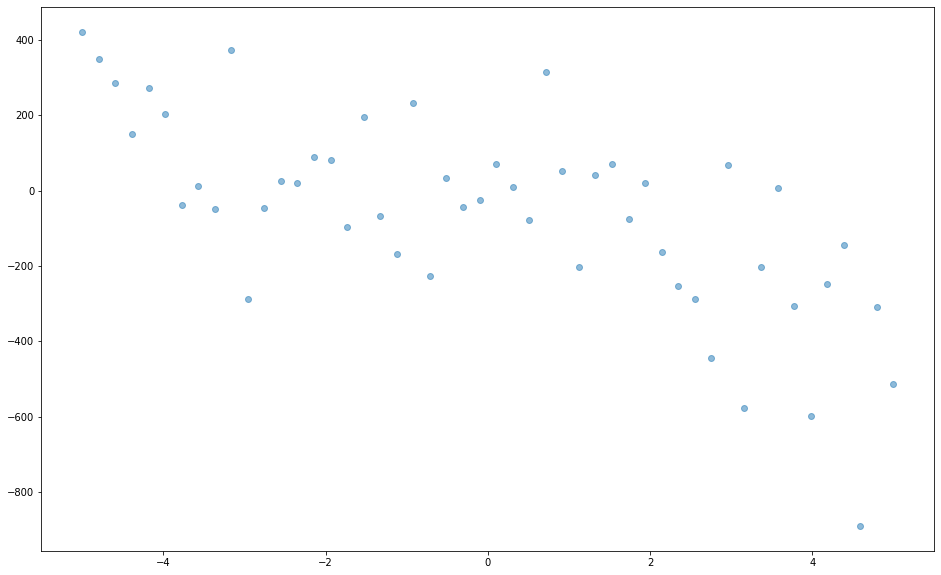

In [14]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)

def f(x) :
    return 5 + x - 2*x**2 - 5*x**3

y = make_labels(X, f, 200)

scatter(X, y, alpha=0.5, marker='o')

print("[       X        |         y     ]")
print([1, 0] * X + [0, 1] * y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

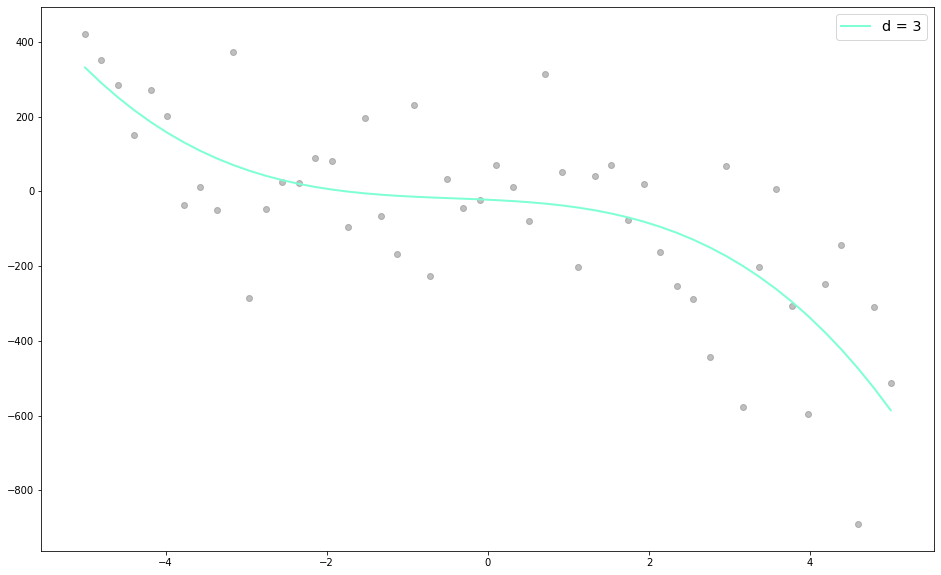

In [17]:
# Vaš kôd ovdje

poly3 = PolynomialFeatures(3, include_bias=True)

X_tilda = poly3.fit_transform(X)


# Get Wights
w = np.dot(linalg.pinv(X_tilda), y)

def h(X, w):
    return np.dot(X, w)


hx = h(X_tilda, w)



s = np.linspace(-5,5, 50);

s = s.reshape(s.shape[0], 1)

s_tilda = poly3.fit_transform(s)


plt.plot(s, h(s_tilda, w), '-', c='aquamarine', label='d = 3')

plt.scatter(X, y, alpha=0.5, marker='o', c='grey')


plt.legend()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

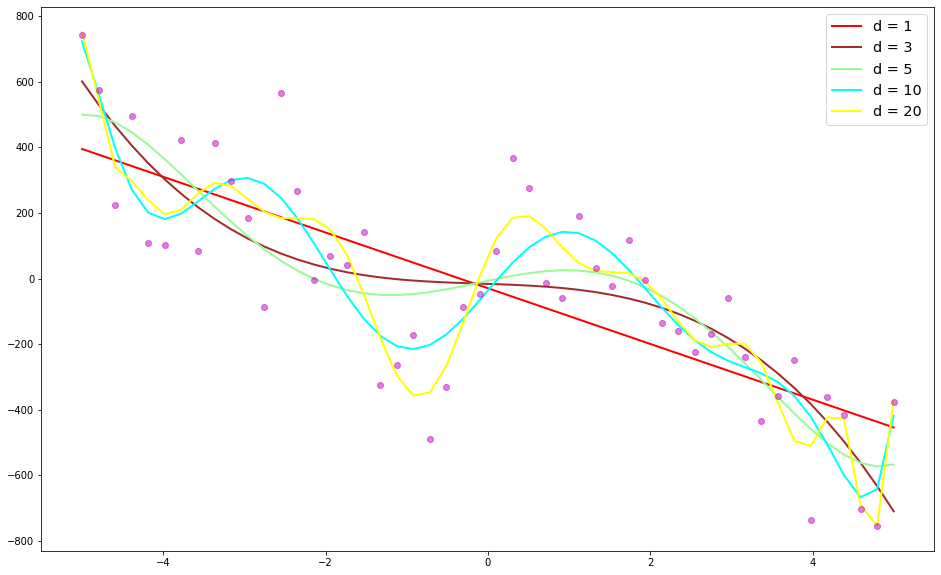

d = [1, 3, 5, 10, 20]
MSError = [47695.06243900121, 37891.07337697145, 35355.90714329102, 23274.041191198852, 17511.23121604152]


In [15]:
# Vaš kôd ovdje

def h(X, w):
    return np.dot(X, w)

Err = []
for d, c in zip([1, 3, 5, 10, 20], ['red', 'brown', 'palegreen', 'cyan', 'yellow']):

    poly_new = PolynomialFeatures(d, include_bias=True)

    X_tilda = poly_new.fit_transform(X)


    # Get Wights
    w = np.dot(linalg.pinv(X_tilda), y)

    hx = h(X_tilda, w)

    s = np.linspace(-5,5, 50);

    s = s.reshape(s.shape[0], 1)

    s_tilda = poly_new.fit_transform(s)

    plt.plot(s, h(s_tilda, w), c, label="d = " + str(d))
    
    E = mean_squared_error(y, hx)
    Err.append(E)

plt.plot(X, y, 'mo',alpha=0.5, linestyle="none")
plt.legend(loc="best")
plt.show()

print("d = [1, 3, 5, 10, 20]")
print("MSError =", Err)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

d =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
MSError Train = [49739.970171128705, 43571.08048768222, 35958.85200376422, 32826.829094353336, 29585.764654955557, 29254.325021945177, 29206.166207939226, 28285.50970814487, 23906.72400009505, 15615.910909956781, 14663.006949483148, 6366.547387799634, 6150.115617782772, 3933.024815847525, 3675.7578057596165, 2762.4683201502694, 1934.8922137745456, 1789.7881610215306, 1769.618845273597, 1838.4282121120498]
MSError Test = [28541.79665253621, 26907.347161577636, 27910.72237939679, 28515.725473365317, 44975.72291305945, 48676.91666001154, 44803.89401220505, 52579.27175998783, 97068.65589168017, 289415.5020209506, 337260.2419029162, 4160737.26684175, 6031975.679974616, 62563530.552808374, 160785587.10468414, 2021678780.5878646, 18515098109.85866, 50307312393.33952, 17294533066.347164, 50593927861.10367]


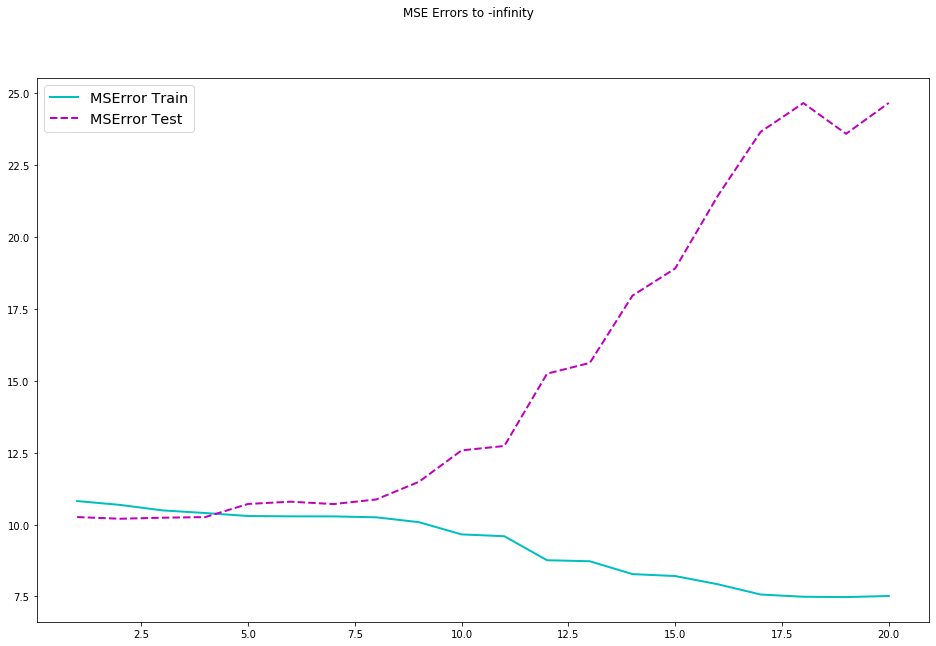

In [27]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)


Err_train = []
Err_test = []

for d in range(1, 21, 1):

    poly_new = PolynomialFeatures(d, include_bias=False)

    X_tilda_train = poly_new.fit_transform(X_train)

    # Get Wights
    w = np.dot(linalg.pinv(X_tilda_train), y_train)
    
    X_tilda_test = poly_new.fit_transform(X_test)

    
    hx_train = h(X_tilda_train, w)
    hx_test = h(X_tilda_test, w)
    
    
    E_train = mean_squared_error(y_train, hx_train)
    E_test = mean_squared_error(y_test, hx_test)
    Err_train.append(E_train)
    Err_test.append(E_test)

d_list = list( range(1,21,1))
print("d = ", d_list)

print("MSError Train =", Err_train)
print("MSError Test =", Err_test)


plt.suptitle('MSE Errors to -infinity')
plt.plot(d_list, np.log(Err_train), 'c', label='MSError Train')
plt.plot(d_list, np.log(Err_test), 'm--', label='MSError Test')
plt.legend(loc="best")

plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

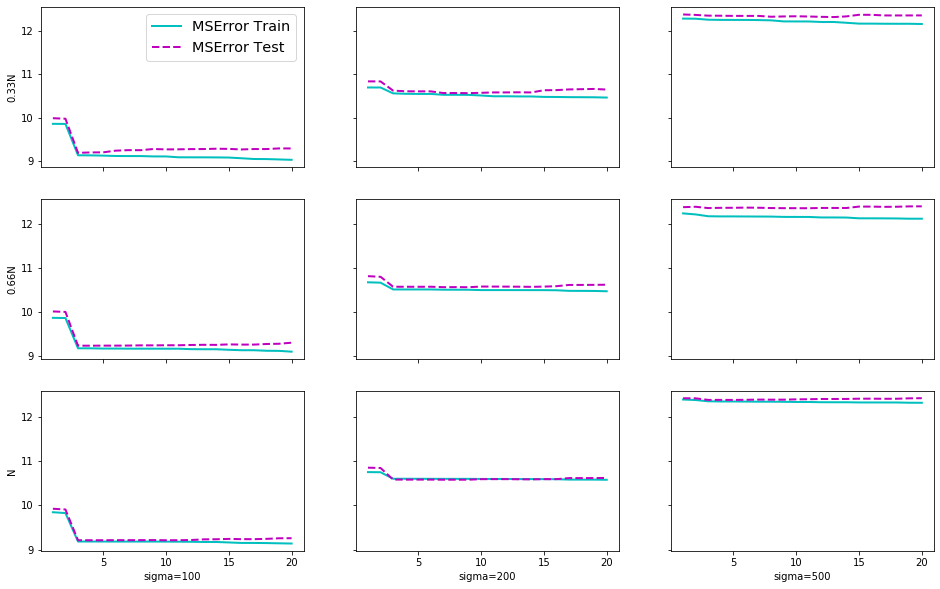

Data idx =  4
log(MSE_Train) 
 [10.67901692 10.67086887 10.51651468 10.5164891  10.5163713  10.51611341
 10.51067714 10.51047392 10.50975885 10.50212379 10.50207079 10.50204263
 10.50152198 10.50116104 10.5008733  10.49798881 10.48466723 10.48401455
 10.4825245  10.47558161]
log(MSE_Test) 
 [10.81870486 10.80390363 10.57827522 10.57778236 10.57713196 10.57825886
 10.56844046 10.56976581 10.5676022  10.5824503  10.58181661 10.58107262
 10.57894744 10.57609458 10.58125105 10.59063204 10.61897762 10.61957173
 10.62113891 10.62420409]
Data idx =  7
log(MSE_Train) 
 [10.7521116  10.74913726 10.60215212 10.60202723 10.60101004 10.60052078
 10.5999236  10.59990836 10.5997557  10.59740302 10.5973352  10.59732198
 10.59511603 10.59444109 10.59337425 10.59210079 10.58296978 10.58288642
 10.58273937 10.57911046]
log(MSE_Test) 
 [10.8518827  10.84491329 10.58380242 10.58213367 10.58280978 10.58278639
 10.58019047 10.580606   10.58060756 10.59266077 10.59338697 10.59301412
 10.5904575  10.58806634 

In [17]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 1000)

def f(x) :
    return 5 + x - 2*x**2 - 5*x**3


def h(X, w):
    return np.dot(X, w)


X_train, X_test = train_test_split(X, test_size=0.5, random_state=66)

y_train_100 = make_labels(X_train, f, 100)
y_train_200 = make_labels(X_train, f, 200)
y_train_500 = make_labels(X_train, f, 500)

y_test_100 = make_labels(X_test, f, 100)
y_test_200 = make_labels(X_test, f, 200)
y_test_500 = make_labels(X_test, f, 500)



seed = 33
Err_train_plot = []
Err_test_plot = []

parts = []

for part in [0.33, 0.66, 1]:


    for y_train, y_test in zip([y_train_100, y_train_200, y_train_500], [y_test_100, y_test_200, y_test_500]):
    
        if (part != 1): 
            reject, X_train_split, reject, y_train_split = train_test_split(
                X_train, y_train, test_size=part, random_state=seed)

            reject, X_test_split, reject, y_test_split  = train_test_split(
                X_test, y_test, test_size=part, random_state=seed)
        else:
            X_train_split = X_train
            y_train_split = y_train
            X_test_split = X_test
            y_test_split = y_test
            
        #Evaluate
        
        Err_train = []
        Err_test = []

        for d in range(1, 21, 1):
            poly_new = PolynomialFeatures(d, include_bias=False)

            X_tilda_train = poly_new.fit_transform(X_train_split)

            # Get Weights
            w = np.dot(linalg.pinv(X_tilda_train), y_train_split)

            X_tilda_test = poly_new.fit_transform(X_test_split)


            hx_train = h(X_tilda_train, w)
            hx_test = h(X_tilda_test, w)
            
            E_train = mean_squared_error(y_train_split, hx_train)
            E_test = mean_squared_error(y_test_split, hx_test)
            Err_train.append(E_train)
            Err_test.append(E_test)
            
            parts.append(part)
            
            
        Err_train_plot.append(Err_train)
        Err_test_plot.append(Err_test)


        
d_list = list( range(1,21,1))

# row and column sharing
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', sharey='row')

for idx, sub in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 ]):
    
    sub.plot(d_list, np.log(Err_train_plot[idx]), 'c', label='MSError Train')
    sub.plot(d_list, np.log(Err_test_plot[idx]), 'm--', label='MSError Test')
    


ax1.legend(loc="best")
#ylabels
ax1.set(ylabel='0.33N')
ax4.set(ylabel='0.66N')
ax7.set(ylabel='N')
#xlabels
ax7.set(xlabel='sigma=100')
ax8.set(xlabel='sigma=200')
ax9.set(xlabel='sigma=500')


plt.show()

plot_idx = 4
print("Data idx = ", plot_idx)
print("log(MSE_Train) \n", np.log(Err_train_plot)[plot_idx])
print("log(MSE_Test) \n", np.log(Err_test_plot)[plot_idx])


plot_idx = 7
print("Data idx = ", plot_idx)
print("log(MSE_Train) \n", np.log(Err_train_plot)[plot_idx])
print("log(MSE_Test) \n", np.log(Err_test_plot)[plot_idx])

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [18]:
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])


poly = PolynomialFeatures(3, include_bias=True)
poly.fit(X)
phi = poly.transform(X)
phi

eye_bez_prvog = np.eye(shape(phi)[1], dtype=int)
eye_bez_prvog[0][0] = 0

for lmbda in [0, 1, 10]:
    inv_mat = np.dot( np.transpose(phi), phi) + lmbda * eye_bez_prvog
    w = np.dot(np.dot( linalg.inv( inv_mat), np.transpose(phi)), y)

    print("lambda =", lmbda)
    print("w = ", w)

print("Modified Eye matrix = \n", eye_bez_prvog)
print("Matrix to invert size = ", shape(inv_mat))

lambda = 0
w =  [ 4.         -5.91666667  3.375      -0.45833333]
lambda = 1
w =  [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda = 10
w =  [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]
Modified Eye matrix = 
 [[0 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Matrix to invert size =  (4, 4)


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [19]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

poly = PolynomialFeatures(3, include_bias=True)
poly.fit(X)
phi = poly.transform(X)
phi
for lmbda in [0, 1, 10]:

    
    clfr = Ridge(alpha=lmbda, fit_intercept=True, normalize=False, copy_X=True)
    clfr.fit(phi, y)

    print("lambda =", lmbda)

    print("Intercept = ", clfr.intercept_)
    print("Coef = ", clfr.coef_)
       

lambda = 0
Intercept =  4.000000000000025
Coef =  [ 0.         -5.91666667  3.375      -0.45833333]
lambda = 1
Intercept =  3.0569614512471652
Coef =  [ 0.         -0.69079365 -0.2831746   0.1445805 ]
lambda = 10
Intercept =  2.4944418431229733
Coef =  [ 0.         -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

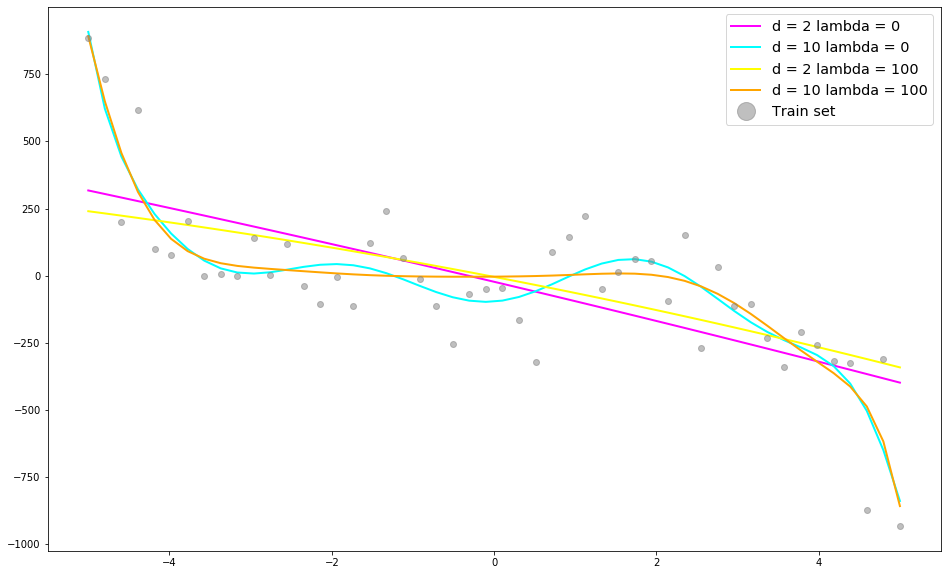

In [20]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)

def f(x) :
    return 5 + x - 2*x**2 - 5*x**3

y = make_labels(X, f, 200)


def h(X, w):
    return np.dot(X, w)

lmbdas = []
ds = []
weights = []
hxs = []

for lmbda in [0, 100]:
    for d in [2, 10]:
        poly3 = PolynomialFeatures(d, include_bias=True)
        X_tilda = poly3.fit_transform(X)

        # Get Weights
        inv_mat = np.dot( np.transpose(X_tilda), X_tilda) + lmbda * np.eye(shape(X_tilda)[1], dtype=int)
        w = np.dot(np.dot( linalg.inv( inv_mat), np.transpose(X_tilda)), y)
        
        hx = h(X_tilda, w)

        ds.append(d)
        lmbdas.append(lmbda)
        weights.append(w)
        hxs.append(hx)

s = np.linspace(-5,5, 50);
s = s.reshape(s.shape[0], 1)


for d, lmbda,  w, c1 in zip(ds, lmbdas, weights, ["magenta", "cyan", "yellow", "orange"]):

    
    poly3 = PolynomialFeatures(d, include_bias=True)
    s_tilda = poly3.fit_transform(s)
    labling = "d = " + str(d) + " lambda = " + str(lmbda)
    plt.plot(s, h(s_tilda, w), c1, label=labling)

plt.plot(X, y, alpha=0.5, marker='o', c='grey', linestyle="none", label = "Train set")

    
plt.legend(loc="upper right")

zoom = 0
if(zoom):
    plt.xlim([0, 10])
    plt.ylim([0, 20])

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


lambda =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
MSError Train = [8084.773030757459, 8545.463767978365, 8898.45729437605, 9169.017108752632, 9382.327862065633, 9555.215424033428, 9698.647494654233, 9819.94518946824, 9924.153493014635, 10014.858197563324, 10094.68013392161, 10165.582550842695, 10229.068088298085, 10286.308677729285, 10338.233518707159, 10385.59012801838, 10428.987629273197, 10468.928072032591, 10505.829494482732, 10540.043176979572, 10571.866754885972, 10601.554301647197, 10629.324183510773, 10655.365250050305, 10679.841759772806, 10702.897330622223, 10724.658144596982, 10745.23556532731, 10764.728286313564, 10783.224115868285, 10800.801458658736, 10817.530564561386, 10833.474574522363, 10848.690413309518, 10863.229545140524, 10877.138623233703, 10890.460045311955, 10903.232433818997, 10915.49105415293, 10927.2681719516

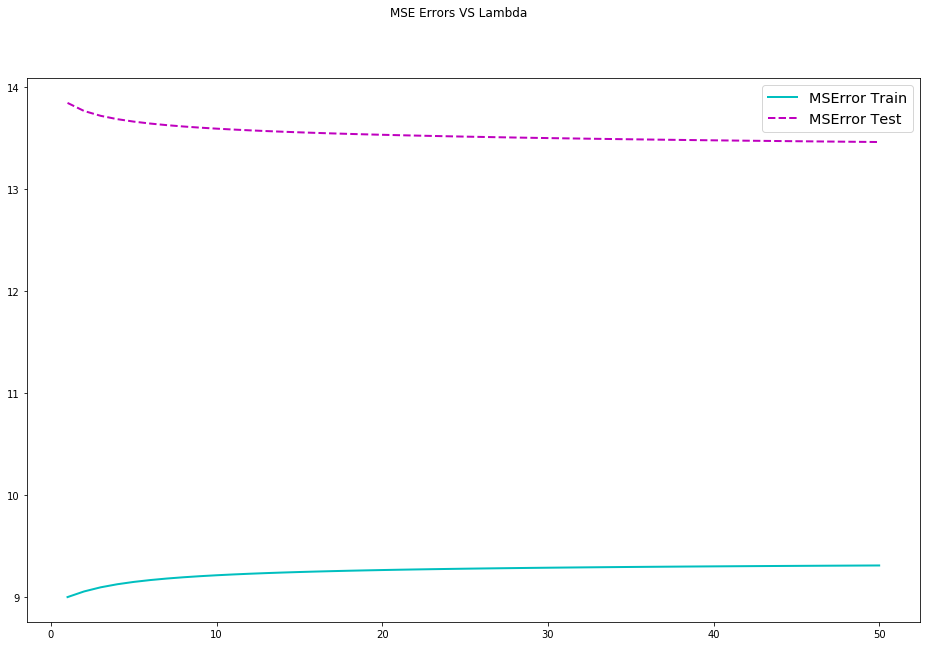

In [21]:
# Vaš kôd ovdje

# Stabilna podjela s konstanim seedom
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)


Err_train = []
Err_test = []

for lmbda in range(1, 51, 1):

    d = 10
    poly_new = PolynomialFeatures(d, include_bias=True)

    X_tilda_train = poly_new.fit_transform(X_train)

    # Get Weights
    inv_mat = np.dot( np.transpose(X_tilda_train), X_tilda_train) + lmbda * np.eye(shape(X_tilda_train)[1], dtype=int)
    w = np.dot(np.dot( linalg.inv( inv_mat), np.transpose(X_tilda_train)), y_train)
    
    X_tilda_test = poly_new.fit_transform(X_test)

    
    hx_train = h(X_tilda_train, w)
    hx_test = h(X_tilda_test, w)
    

    
    E_train = mean_squared_error(y_train, hx_train)
    E_test = mean_squared_error(y_test, hx_test)
    Err_train.append(E_train)
    Err_test.append(E_test)

lmbda_list = list( range(1,51,1))
print("lambda = ", lmbda_list)

print("MSError Train =", Err_train)
print("MSError Test =", Err_test)
#print(size(Err_train))


plt.suptitle('MSE Errors VS Lambda')
plt.plot(lmbda_list, np.log(Err_train), 'c', label='MSError Train')
plt.plot(lmbda_list, np.log(Err_test), 'm--', label='MSError Test')
plt.legend(loc="best")

plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [22]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

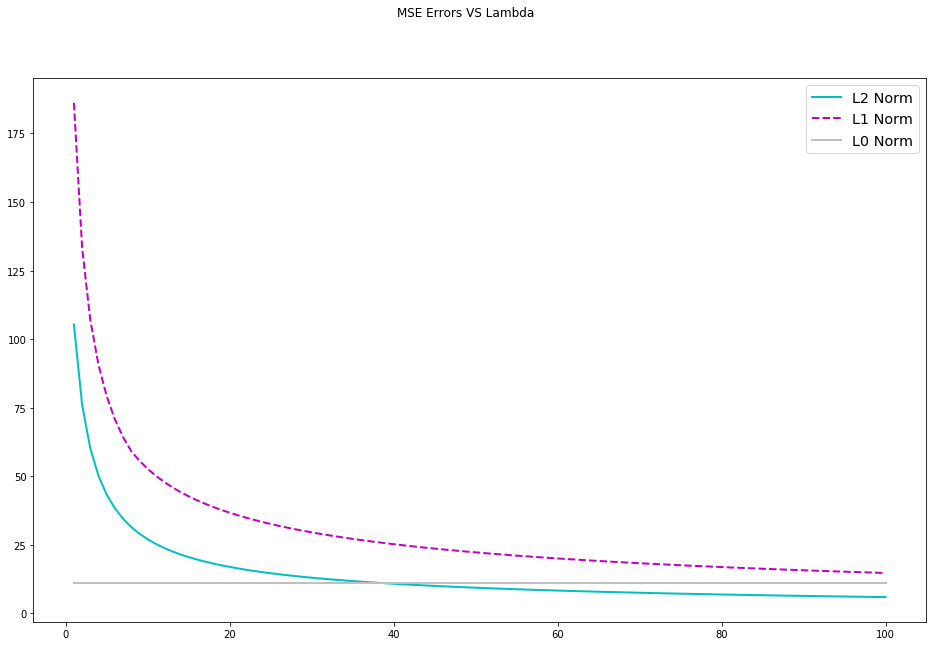

In [32]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

# Stabilna podjela s konstanim seedom
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)


Err_train = []
Err_test = []


L2s = []
L1s = []
L0s = []

for lmbda in range(1, 101, 1):

    d = 10
    poly_new = PolynomialFeatures(d, include_bias=True)

    X_tilda_train = poly_new.fit_transform(X_train)

    # Get Weights
    inv_mat = np.dot( np.transpose(X_tilda_train), X_tilda_train) + lmbda * np.eye(shape(X_tilda_train)[1], dtype=int)
    w = np.dot(np.dot( linalg.inv( inv_mat), np.transpose(X_tilda_train)), y_train)
    
    X_tilda_test = poly_new.fit_transform(X_test)

    
    hx_train = h(X_tilda_train, w)
    hx_test = h(X_tilda_test, w)
    
    
    E_train = mean_squared_error(y_train, hx_train)
    E_test = mean_squared_error(y_test, hx_test)
    Err_train.append(E_train)
    Err_test.append(E_test)
    
    
    #L2 norm
    L2 = np.sqrt(np.dot(np.transpose(w), w))[0]
    
    #L1 norm
    L1 = sum(abs(w), axis=0)[0]
    
    #L0 norm
    L0 = nonzeroes(w)
    
    
    L2s.append(L2)
    L1s.append(L1)
    L0s.append(L0)
    
    
lmbda_list = list( range(1,101,1))


plt.suptitle('MSE Errors VS Lambda')
plt.plot(lmbda_list, L2s, 'c', label='L2 Norm')
plt.plot(lmbda_list, L1s, 'm--', label='L1 Norm')
plt.plot(lmbda_list, L0s, 'silver', label='L0 Norm')
plt.legend(loc="best")


plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

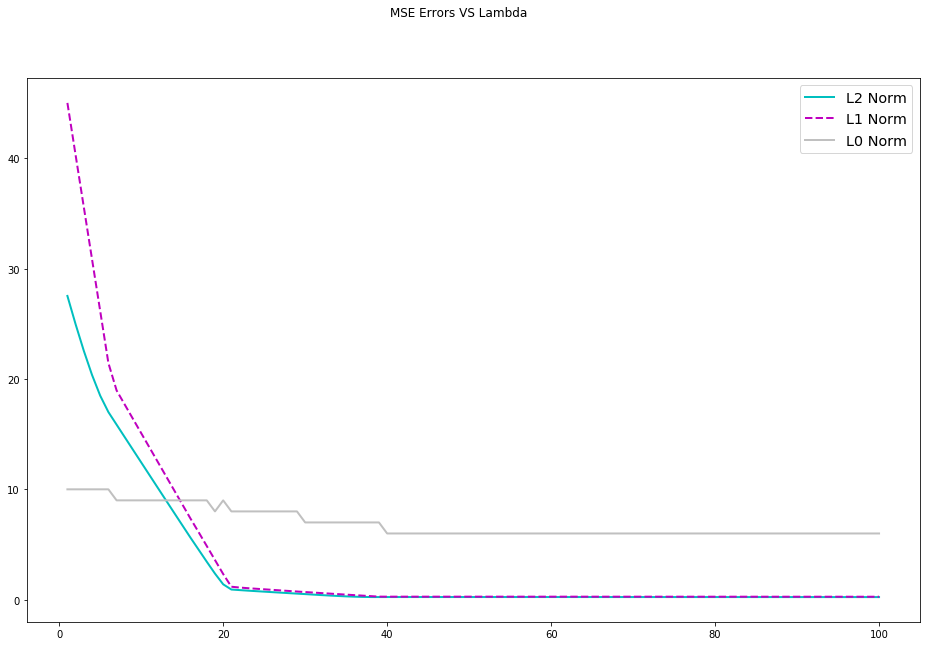

In [24]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

import warnings
warnings.filterwarnings(action='ignore')


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Stabilna podjela s konstanim seedom
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)


Err_train = []
Err_test = []


L2s = []
L1s = []
L0s = []

for lmbda in range(1, 101, 1):

    
    
    d = 10
    poly_new = PolynomialFeatures(d, include_bias=True)

    X_tilda_train = poly_new.fit_transform(X_train)    
    X_tilda_test = poly_new.fit_transform(X_test)

    
    clf = sklearn.linear_model.Lasso(alpha=lmbda, fit_intercept=True)
    clf.fit(X_tilda_train, y_train)
    
    w = clf.coef_
    
    hx_train = h(X_tilda_train, w)
    hx_test = h(X_tilda_test, w)
    

    
    E_train = mean_squared_error(y_train, hx_train)
    E_test = mean_squared_error(y_test, hx_test)
    Err_train.append(E_train)
    Err_test.append(E_test)
    
    
    #L2 norm
    #L2 = sqrt(sum(w**2, axis=0)) = sqrt(np.dot(np.transpose(w), w))
    L2 = np.sqrt(np.dot(np.transpose(w), w))
    
    #L1 norm
    L1 = sum(abs(w), axis=0)
    
    #L0 norm
    L0 = nonzeroes(w)
    
    
    L2s.append(L2)
    L1s.append(L1)
    L0s.append(L0)
    
    


plt.suptitle('MSE Errors VS Lambda')
plt.plot(lmbda_list, L2s, 'c', label='L2 Norm')
plt.plot(lmbda_list, L1s, 'm--', label='L1 Norm')
plt.plot(lmbda_list, L0s, 'silver', label='L0 Norm')
plt.legend(loc="best")



### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [25]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

[Text(0, 0.5, 'Grade'), Text(0.5, 0, 'Grade in Highscool')]

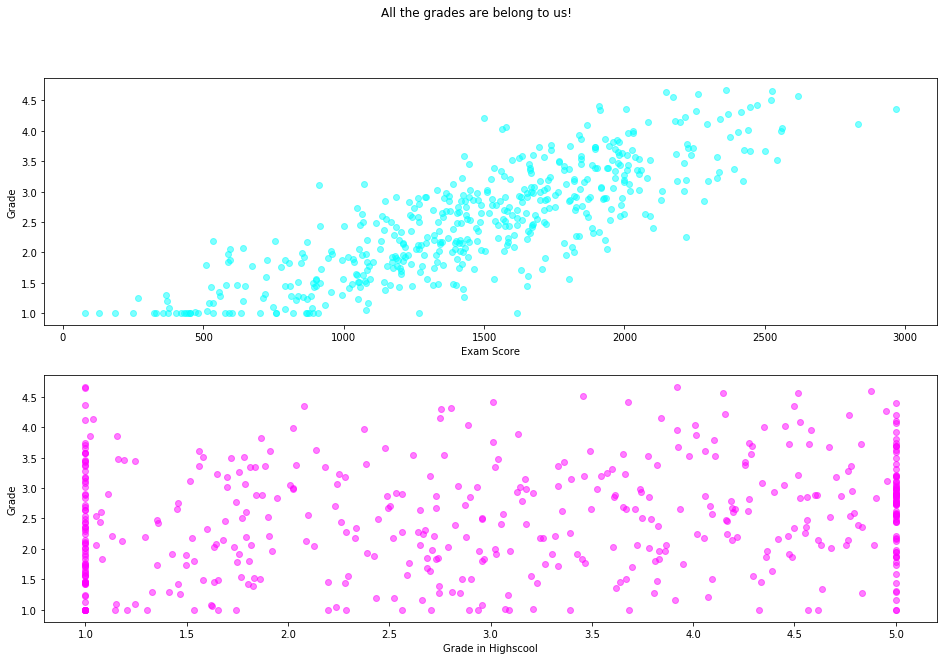

In [26]:
# Vaš kôd ovdje

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('All the grades are belong to us!')


# Y vs X1

ax1.scatter(exam_score, grades_y, alpha=0.5, c='cyan')

ax1.set(xlabel='Exam Score', ylabel='Grade')


# Y vs X2

ax2.scatter(grade_in_highschool, grades_y, alpha=0.5, c='magenta')

ax2.set(xlabel='Grade in Highscool', ylabel='Grade')


### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [27]:
# Vaš kôd ovdje
lmbda = 0.01
clfr = Ridge(alpha=lmbda, fit_intercept=True, normalize=False, copy_X=True)
clfr.fit(grades_X, grades_y)

print(clfr.intercept_)
print(clfr.coef_)

0.15061179575776018
[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

[8.62551331e-17]
[[0.81630375 0.15167761]]


[Text(0, 0.5, 'High School Grade'), Text(0.5, 0, 'Exam Score')]

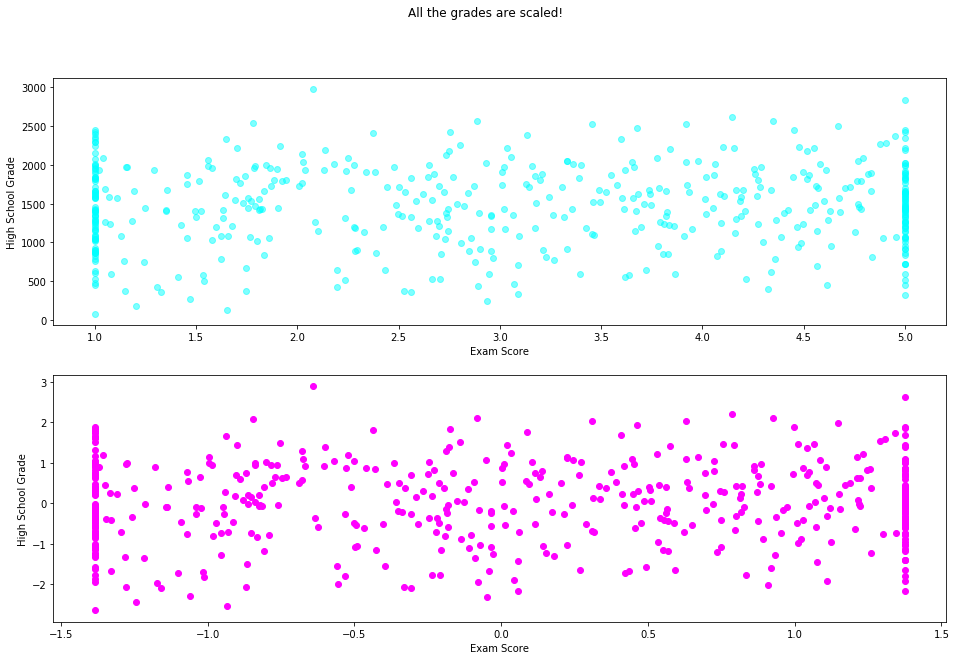

In [28]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
sclr = StandardScaler(copy=True, with_mean=True, with_std=True)

sclr.fit(grades_X)
grades_X_scaled = sclr.transform(grades_X)


grades_y_scaled = sclr.fit_transform(grades_y.reshape(-1, 1))


grades_X_fixed = grades_X_scaled
grades_y_fixed = grades_y_scaled


lmbda = 0.01
clfr = Ridge(alpha=lmbda, fit_intercept=True, normalize=False, copy_X=True)
clfr.fit(grades_X_scaled, grades_y_scaled)

print(clfr.intercept_)
print(clfr.coef_)



fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('All the grades are scaled!')


sclr = StandardScaler(copy=True, with_mean=True, with_std=True)

sclr.fit(grades_X)
grades_X_scaled = sclr.transform(grades_X)


# Unscaled
ax1.scatter([i[1] for i in grades_X], [i[0] for i in grades_X], alpha=0.5, c='cyan')

ax1.set(xlabel='Exam Score', ylabel='High School Grade')


# Scaled
ax2.scatter([i[1] for i in grades_X_scaled], [i[0] for i in grades_X_scaled], c='magenta')

ax2.set(xlabel='Exam Score', ylabel='High School Grade')



**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [29]:
# Vaš kôd ovdje

# Matrica dizajna.
#grades_X_fixed_colinear = np.array([exam_score,grade_in_highschool, grade_in_highschool]).T
#print(grades_X_fixed_colinear)

#print(grades_X_fixed)

grades_X_fixed_colinear = np.array([ [i[0] for i in grades_X_fixed],[i[1] for i in grades_X_fixed],[i[1] for i in grades_X_fixed] ]).T
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [30]:
# Vaš kôd ovdje
lmbda = 0.01
clfr = Ridge(alpha=lmbda, fit_intercept=True, normalize=False, copy_X=True)
clfr.fit(grades_X_fixed_colinear, grades_y_fixed)

print(clfr.intercept_)
print(clfr.coef_)

[8.6255971e-17]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [31]:
# Vaš kôd ovdje
Ws_001 = []
Ws_1000 = []

for i in range(10):
    grades_X_splitted, X_rejected, grades_y_splitted, y_rejected = train_test_split(
        grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)

    lmbda = 0.01
    clfr_001 = Ridge(alpha=lmbda, fit_intercept=True, normalize=False, copy_X=True)
    clfr_001.fit(grades_X_splitted, grades_y_splitted)

    print("Iter = ", i + 1)
    print("Intercept_001 =",clfr_001.intercept_)
    print("W_001 = ", clfr_001.coef_)

    lmbda = 1000
    clfr_1000 = Ridge(alpha=lmbda, fit_intercept=True, normalize=False, copy_X=True)
    clfr_1000.fit(grades_X_splitted, grades_y_splitted)

    print("Intercept_1000 =", clfr_1000.intercept_)
    print("W_1000 = ", clfr_1000.coef_)

    Ws_001.append(clfr_001.coef_)
    Ws_1000.append(clfr_1000.coef_)
    
    print("")
    

#print("W_001 =",  Ws_001)
#print("W_1000 =", Ws_1000)

print("Std W_001 =", np.std(Ws_001, axis=0))
print("Std W_1000 =", np.std(Ws_1000, axis= 0))


Iter =  1
Intercept_001 = [-0.01045662]
W_001 =  [[0.79385128 0.06504303 0.06504303]]
Intercept_1000 = [-0.0234989]
W_1000 =  [[0.16436364 0.03812874 0.03812874]]

Iter =  2
Intercept_001 = [0.02152062]
W_001 =  [[0.80739011 0.0761075  0.0761075 ]]
Intercept_1000 = [0.03212117]
W_1000 =  [[0.15992321 0.02415424 0.02415424]]

Iter =  3
Intercept_001 = [0.00921447]
W_001 =  [[0.814158   0.07673386 0.07673386]]
Intercept_1000 = [-0.02601733]
W_1000 =  [[0.16128257 0.02717137 0.02717137]]

Iter =  4
Intercept_001 = [-0.01820559]
W_001 =  [[0.83265053 0.07483515 0.07483515]]
Intercept_1000 = [-0.04966402]
W_1000 =  [[0.16579999 0.03405283 0.03405283]]

Iter =  5
Intercept_001 = [0.01261939]
W_001 =  [[0.79735626 0.08013669 0.08013669]]
Intercept_1000 = [-0.0250465]
W_1000 =  [[0.15703356 0.02664742 0.02664742]]

Iter =  6
Intercept_001 = [0.00283109]
W_001 =  [[0.81845427 0.04525193 0.04525193]]
Intercept_1000 = [0.01706322]
W_1000 =  [[0.17833349 0.03188297 0.03188297]]

Iter =  7
Intercep

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.